In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from statsmodels.tools.eval_measures import mse, rmse

In [2]:
# Import dataset.
df = pd.read_csv('/Users/harshini/Desktop/Ensemble/SampleData.csv')
print("This dataset contains {} rows and {} columns.".format(df.shape[0],df.shape[1]))

df.head()

This dataset contains 81886 rows and 7 columns.


,TimeStamp,Device,Power,Rotor_Speed,Wind_Speed,Ambient_Temperature,Target_Temp
0,1/1/2017 0:00,WT-001,-4.960554,0.0,8.247060,0.651978,4.779412
1,1/1/2017 0:10,WT-001,-5.020246,0.0,8.426003,0.589799,4.743060
2,1/1/2017 0:20,WT-001,-5.035249,0.0,8.130890,0.544098,4.700070
3,1/1/2017 0:30,WT-001,-4.972121,0.0,7.754125,0.452907,4.674818
4,1/1/2017 0:40,WT-001,-4.941651,0.0,8.085228,0.437470,4.654494


In [3]:
# Check for null values
df.isnull().sum()

TimeStamp              0
Device                 0
Power                  0
Rotor_Speed            0
Wind_Speed             0
Ambient_Temperature    0
Target_Temp            0
dtype: int64

In [4]:
# Verify the datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81886 entries, 0 to 81885
Data columns (total 7 columns):
TimeStamp              81886 non-null object
Device                 81886 non-null object
Power                  81886 non-null float64
Rotor_Speed            81886 non-null float64
Wind_Speed             81886 non-null float64
Ambient_Temperature    81886 non-null float64
Target_Temp            81886 non-null float64
dtypes: float64(5), object(2)
memory usage: 4.4+ MB


From the above, it is clear that all are Continuous variables except Device and TimeStamp.

In [5]:
df.nunique()

TimeStamp              79028
Device                     1
Power                  76938
Rotor_Speed            60663
Wind_Speed             78163
Ambient_Temperature    78618
Target_Temp            73551
dtype: int64

In [6]:
# Split the TimeStamp into 2 columns 'Date' and 'Time'
new = df["TimeStamp"].str.split(" ", expand = True)
df["Date"]= new[0]
df["Time"]= new[1]
df.head()

,TimeStamp,Device,Power,Rotor_Speed,Wind_Speed,Ambient_Temperature,Target_Temp,Date,Time
0,1/1/2017 0:00,WT-001,-4.960554,0.0,8.247060,0.651978,4.779412,1/1/2017,0:00
1,1/1/2017 0:10,WT-001,-5.020246,0.0,8.426003,0.589799,4.743060,1/1/2017,0:10
2,1/1/2017 0:20,WT-001,-5.035249,0.0,8.130890,0.544098,4.700070,1/1/2017,0:20
3,1/1/2017 0:30,WT-001,-4.972121,0.0,7.754125,0.452907,4.674818,1/1/2017,0:30
4,1/1/2017 0:40,WT-001,-4.941651,0.0,8.085228,0.437470,4.654494,1/1/2017,0:40


In [7]:
# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Derive a Month column from Date
df['Month']=df['Date'].dt.month

# Derive Year column from Date
df['Year']=df['Date'].dt.year

# Convert Time to Minutes
df['Minutes'] = df['Time'].apply(lambda s: int(s[:-3]) * 60 + int(s[-2:]))

df.Year.value_counts()

2017    51476
2018    30410
Name: Year, dtype: int64

In [8]:
# Define a function to convert Month column to a categorical column called Season
def months_to_seasons(inp):
    if inp in [12,1,2]:
        return "Winter"
    elif inp in [3,4,5]:
        return "Spring"
    elif inp in [6,7,8]:
        return "Summer"
    else:
        return "Fall"
    
df["Season"] = df["Month"].apply(months_to_seasons)

# Number of observations for each season
print("Number of observations w.r.t seasons : \n")
print(df.groupby("Season")["Season"].count())

Number of observations w.r.t seasons : 

Season
Fall      13104
Spring    26400
Summer    19932
Winter    22450
Name: Season, dtype: int64


In [9]:
# Drop the column 'Device' as it has a single value and makes no effect.
df = df.drop('Device',axis=1)

# Drop the original columns 'TimeStamp','Date','Time' and 'Month' as we derived new columns from them
df = df.drop('TimeStamp',axis=1)
df = df.drop('Date',axis=1)
df = df.drop('Time',axis=1)
df = df.drop('Month',axis=1)

df.nunique()

Power                  76938
Rotor_Speed            60663
Wind_Speed             78163
Ambient_Temperature    78618
Target_Temp            73551
Year                       2
Minutes                  146
Season                     4
dtype: int64

In [10]:
# Rename column 'Minutes'
df = df.rename(columns={"Minutes": "Time_Stamp"})

In [11]:
# Summary Statistics
df.describe()

,Power,Rotor_Speed,Wind_Speed,Ambient_Temperature,Target_Temp,Year,Time_Stamp
count,81886.000000,81886.000000,81886.000000,81886.000000,81886.000000,81886.000000,81886.000000
mean,751.989366,10.723839,7.185280,9.479751,33.630305,2017.371370,714.904660
std,660.656766,4.746975,3.434407,11.325173,58.602834,0.483174,415.240131
min,-16.953500,0.000000,-0.006400,-19.559160,-7.144675,2017.000000,0.000000
25%,127.873125,9.470116,4.687144,0.559316,22.098690,2017.000000,360.000000
50%,570.643300,10.829790,6.860716,8.823173,27.761085,2017.000000,720.000000
75%,1448.384750,14.655530,9.418991,19.320918,37.594753,2018.000000,1070.000000
max,1792.714000,16.443700,62.633950,34.767780,852.529400,2018.000000,1430.000000


<b>Outlier Detection

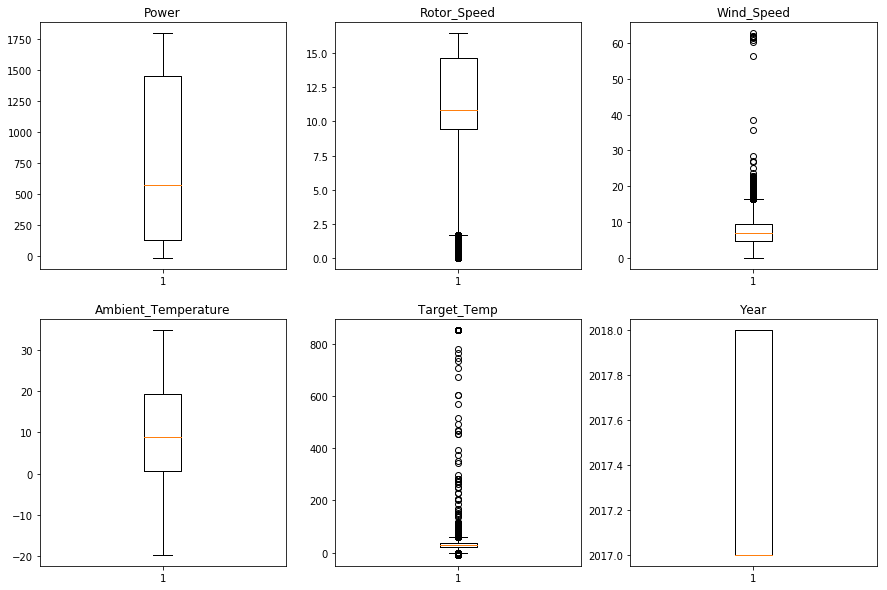

In [12]:
# Detect outliers in data using box plots.

# Extract numeric columns.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
index = [1,2,3,4,5,6]
# Create a dictionary of numeric columns
num_dict = dict(zip(num_cols, index))

plt.figure(figsize=(15,10))
for variable,i in num_dict.items():
                     plt.subplot(2,3,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)
plt.show()

<b>Treating Outliers using Winsorization technique

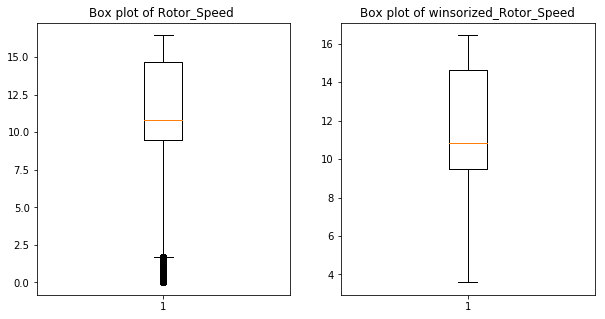

In [13]:
# Treating outliers for the variable 'Rotor_Speed'
from scipy.stats.mstats import winsorize
winsorized_Rotor_Speed = winsorize(df["Rotor_Speed"], (0.12, 0))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(df['Rotor_Speed'])
plt.title("Box plot of Rotor_Speed ")

plt.subplot(1,2,2)
plt.boxplot(winsorized_Rotor_Speed)
plt.title("Box plot of winsorized_Rotor_Speed")
plt.show()

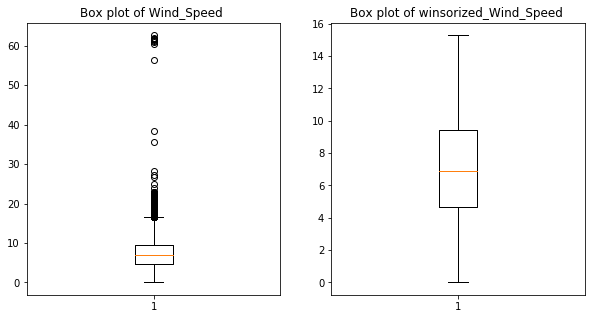

In [14]:
# Treating outliers for the variable 'Wind_Speed'
winsorized_Wind_Speed = winsorize(df["Wind_Speed"], (0, 0.02))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(df['Wind_Speed'])
plt.title("Box plot of Wind_Speed ")

plt.subplot(1,2,2)
plt.boxplot(winsorized_Wind_Speed)
plt.title("Box plot of winsorized_Wind_Speed ")
plt.show()

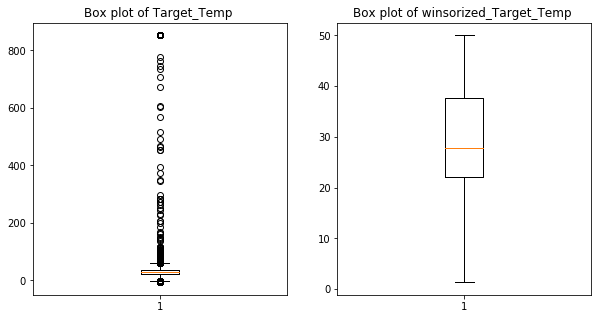

In [15]:
# Treating outliers for the variable 'Target_Temp'
winsorized_Target_Temp = winsorize(df["Target_Temp"], (0.01, 0.01))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(df['Target_Temp'])
plt.title("Box plot of Target_Temp ")

plt.subplot(1,2,2)
plt.boxplot(winsorized_Target_Temp)
plt.title("Box plot of winsorized_Target_Temp ")
plt.show()

In [16]:
# Adding Winsorized columns to the dataframe.
df['winsorized_Rotor_Speed'] = winsorized_Rotor_Speed
df['winsorized_Wind_Speed'] = winsorized_Wind_Speed
df['winsorized_Target_Temp'] = winsorized_Target_Temp

In [17]:
# Drop the original variables.
df = df.drop('Rotor_Speed',axis=1)
df = df.drop('Wind_Speed',axis=1)
df = df.drop('Target_Temp',axis=1)

<b>Univariate analysis

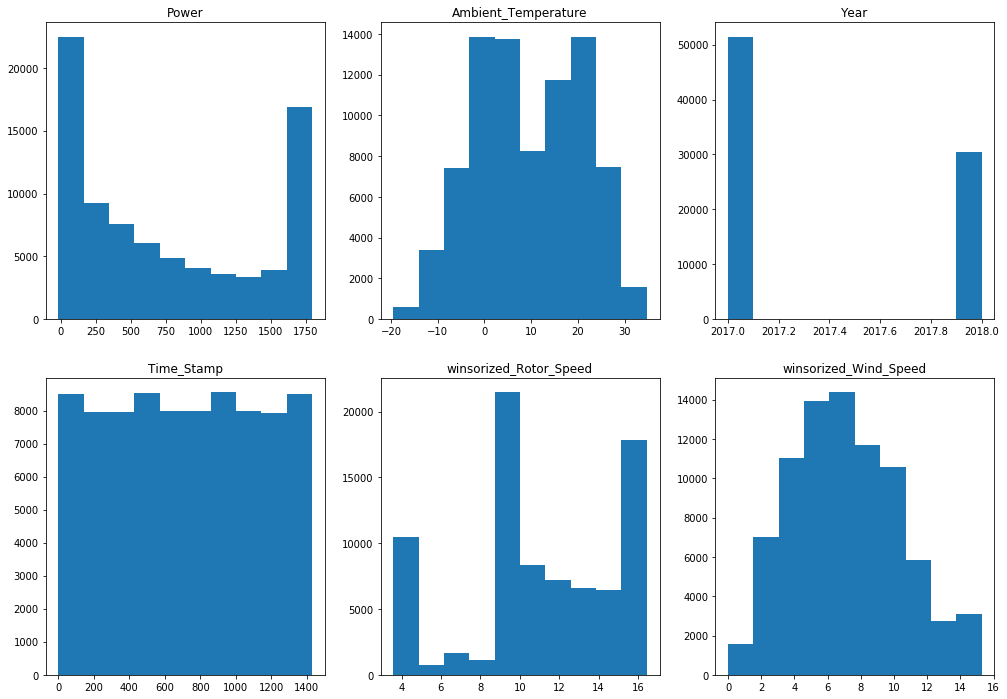

In [18]:
# Extract numeric columns.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
index = [1,2,3,4,5,6]
# Create a dictionary of numeric columns
col_dict = dict(zip(num_cols, index))

plt.figure(figsize=(17,12))
for variable,i in col_dict.items():
                     plt.subplot(2,3,i)
                     plt.hist(df[variable])
                     plt.title(variable)
plt.show()

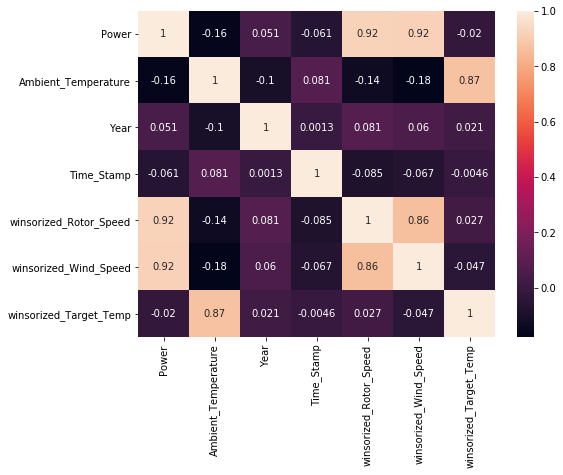

In [19]:
# Find correlation using heatmap.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [20]:
df.corr()['winsorized_Target_Temp'].sort_values(ascending=False)

winsorized_Target_Temp    1.000000
Ambient_Temperature       0.872114
winsorized_Rotor_Speed    0.027140
Year                      0.020591
Time_Stamp               -0.004623
Power                    -0.020441
winsorized_Wind_Speed    -0.047497
Name: winsorized_Target_Temp, dtype: float64

<b>From the above, it is clear that only Ambient_Temperature has high correlation w.r.t the target variable compared to others. Let us statistically confirm this by checking the p value.

In [21]:
# Encoding categorical variable to numeric.
df = pd.concat([df, pd.get_dummies(df["Season"])], axis=1)
df = df.drop('Season',axis=1)

In [22]:
#Split the data into train and test sets. i.e. all 2017 observations as train and 2018 observations as test set.
train = df[df['Year']==2017]
test = df[df['Year']==2018]

train = train.drop('Year',axis=1)
test = test.drop('Year',axis=1)

xtrain = train.drop('winsorized_Target_Temp',axis=1)
ytrain = train['winsorized_Target_Temp']

xtest = test.drop('winsorized_Target_Temp',axis=1)
ytest = test['winsorized_Target_Temp']

In [23]:
from sklearn import linear_model

X = df.drop('winsorized_Target_Temp',axis=1)
Y = df['winsorized_Target_Temp']
model = linear_model.LinearRegression()
model.fit(X,Y)

print('\nCoefficients: \n', model.coef_)
print('\nIntercept: \n', model.intercept_)


Coefficients: 
 [ 2.47310839e-04  6.69626002e-01  2.62657923e+00 -1.27999353e-03
  4.32695700e-01 -8.90370976e-02  1.22142454e+00 -2.48181594e+00
  3.70710864e+00 -2.44671723e+00]

Intercept: 
 -5278.599046320581


<b>But we are more interested in identifying the significance of these coefficients. We can determine this using Statistical T-test. Let us use "statsmodels" to get T-test, p values and many other statistical information.

In [24]:
# Interpreting estimated coefficients using statsmodel
import statsmodels.api as sm

xtrain = sm.add_constant(xtrain)
model1 = sm.OLS(ytrain, xtrain).fit()
model1.summary()

/Users/harshini/har/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     winsorized_Target_Temp   R-squared:                       0.847
Model:                                OLS   Adj. R-squared:                  0.847
Method:                     Least Squares   F-statistic:                 3.563e+04
Date:                    Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                            13:38:00   Log-Likelihood:            -1.4956e+05
No. Observations:                   51476   AIC:                         2.991e+05
Df Residuals:                       51467   BIC:                         2.992e+05
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14.4756      0.090    160.379      0.000      14.299      14.653
Power                      0.0003   9.66e-05      3.067      0.002       0.000       0.000
Ambient_Temperature        0.6994      0.003    250.552      0.000       0.694       0.705
Time_Stamp                -0.0010   4.75e-05    -21.305      0.000      -0.001      -0.001
winsorized_Rotor_Speed     0.4784      0.012     38.831      0.000       0.454       0.503
winsorized_Wind_Speed     -0.0703      0.014     -4.917      0.000      -0.098      -0.042
Fall                       4.6999      0.042    111.442      0.000       4.617       4.783
Spring                    -0.9868      0.041    -24.024      0.000      -1.067      -0.906
Summer                     9.5909      0.055    175.331      0.000       9.484       9.698
Winter                     1.1716      0.049     23.903      0.000       1.076       1.268
==============================================================================
Omnibus:                     4897.726   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24251.867
Skew:                           0.340   Prob(JB):                         0.00
Kurtosis:                       6.293   Cond. No.                     4.25e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<b>From the above, p-values of all variables are less than 0.05. Hence we can interpret that all variables are statistically significant in determining the target variable. Let us utilize all variables for modeling.

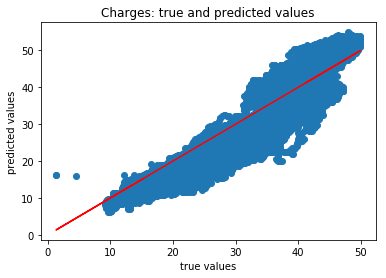

In [25]:
xtest = sm.add_constant(xtest)

# We are making predictions here
y_preds = model1.predict(xtest)

plt.scatter(ytest, y_preds)
plt.plot(ytest, ytest, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

<b>In the graph, we see that our model predicts the lower values of the target better than the higher values. By using visualizations like this, we can more intuitively understand the performance of the models. But, we need to find more accurate ways of assessing our models. Let us find how good the predictions are using the metric below.

In [26]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(ytest, y_preds)))

Mean absolute error of the prediction is: 5.041462831653051


<b>Now we got the Mean error = 5.04. If you observe the distribution of the target variable from below, we see that it is not normally distributed. Let us try to improvise the model by converting the target variable to normal distribution using boxcox transformation technique.

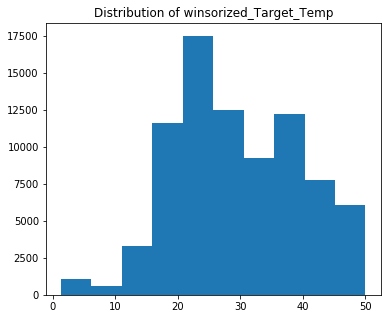

In [27]:
# Distribution of the target variable
plt.figure(figsize=(6,5))
plt.hist(df['winsorized_Target_Temp'])
plt.title("Distribution of winsorized_Target_Temp")
plt.show()

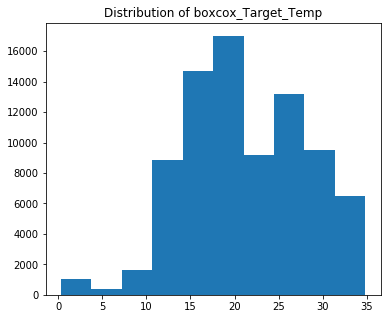

In [28]:
# Convert target variable to normal distribution using boxcox transformation.
from scipy.stats import boxcox
boxcox_Target_Temp,_ = boxcox(df['winsorized_Target_Temp'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_Target_Temp)
plt.title("Distribution of boxcox_Target_Temp")
plt.show()

After the transformation, Target_Temp is not fully coverted to a normal distribution but it is somewhat better than the original.

In [29]:
# Create new test and train sets
df['boxcox_Target_Temp'] = boxcox_Target_Temp
df = df.drop('winsorized_Target_Temp',axis=1)

train1 = df[df['Year']==2017]
test1 = df[df['Year']==2018]

train1 = train1.drop('Year',axis=1)
test1 = test1.drop('Year',axis=1)

In [30]:
xtrain1 = train1.drop('boxcox_Target_Temp',axis=1)
ytrain1 = train1['boxcox_Target_Temp']

xtest1 = test1.drop('boxcox_Target_Temp',axis=1)
ytest1 = test1['boxcox_Target_Temp']

In [31]:
import statsmodels.api as sm

xtrain1 = sm.add_constant(xtrain1)
model2 = sm.OLS(ytrain1, xtrain1).fit()
model2.summary()

/Users/harshini/har/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     boxcox_Target_Temp   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 3.533e+04
Date:                Thu, 25 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:38:01   Log-Likelihood:            -1.3002e+05
No. Observations:               51476   AIC:                         2.601e+05
Df Residuals:                   51467   BIC:                         2.601e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10.5798      0.062    171.303      0.000      10.459      10.701
Power                      0.0003   6.61e-05      3.878      0.000       0.000       0.000
Ambient_Temperature        0.4807      0.002    251.653      0.000       0.477       0.484
Time_Stamp                -0.0007   3.25e-05    -21.010      0.000      -0.001      -0.001
winsorized_Rotor_Speed     0.3758      0.008     44.576      0.000       0.359       0.392
winsorized_Wind_Speed     -0.1051      0.010    -10.738      0.000      -0.124      -0.086
Fall                       3.4440      0.029    119.344      0.000       3.387       3.501
Spring                    -0.3855      0.028    -13.717      0.000      -0.441      -0.330
Summer                     6.5365      0.037    174.633      0.000       6.463       6.610
Winter                     0.9848      0.034     29.362      0.000       0.919       1.051
==============================================================================
Omnibus:                     4389.622   Durbin-Watson:                   0.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24960.489
Skew:                           0.196   Prob(JB):                         0.00
Kurtosis:                       6.389   Cond. No.                     4.25e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
xtest1 = sm.add_constant(xtest1)

# We are making predictions here
y_preds = model2.predict(xtest1)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(ytest1, y_preds)))

Mean absolute error of the prediction is: 3.4524168606839116


<b>From the above it is observed that Mean absolute error is reduced when the target variable is transformed to a normal distribution. Let us see if there is any scope of more improvement of the model.

In [33]:
xtest1 = sm.add_constant(xtest1)

# We are making predictions here
y_preds = model2.predict(xtest1)
y_pred_train = model2.predict(xtrain1)

print("Mean absolute error of the prediction on test set is: {}".format(mean_absolute_error(ytest1, y_preds)))
print("Mean absolute error of the prediction on train set is: {}".format(mean_absolute_error(ytrain1, y_pred_train)))

Mean absolute error of the prediction on test set is: 3.4524168606839116
Mean absolute error of the prediction on train set is: 2.157764355862423


/Users/harshini/har/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


From the above, it is clear that the model performs well on the training set compared to testing set. It is a sign of overfitting. Let us generalize the model using regularization techniques like Ridge.

<b> Regularization

In [34]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**6.4) 
ridgeregr.fit(xtrain1, ytrain1)

# We are making predictions here
y_preds_train = ridgeregr.predict(xtrain1)
y_preds_test = ridgeregr.predict(xtest1)


print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(ytest1, y_preds_test)))


Mean absolute error of the prediction is: 1.6840467988801262


<b> Regularization technique helped the model to generalize well by reducing the Mean error to 1.68